# Word2Vec
here I implement word2vec with very simple example using tensorflow  
word2vec is vector representation for words with similarity

# Collect Data
we will use only 10 sentences to create word vectors

In [0]:
!pip install kmodes

In [0]:
import numpy as np
from kmodes.kmodes import KModes

# random categorical data
data = np.random.choice(20, (100, 10))


In [0]:
data

array([[10,  2, 11,  7, 14, 19,  4,  1,  2, 17],
       [ 8,  2,  7,  6, 15,  7,  2, 14,  1, 11],
       [11,  8, 16, 12,  9,  2,  6,  1,  1,  2],
       [13, 18,  3,  3, 18,  1,  0, 19, 14,  8],
       [12,  0, 18,  0, 10, 10, 15,  7, 15, 16],
       [18, 16,  8,  7,  9, 12,  9, 11, 18, 17],
       [ 5, 14, 11,  7,  8,  5,  2,  4, 17,  5],
       [ 5,  8,  9, 19, 19,  3,  5,  8, 18,  0],
       [ 7,  0,  8,  2,  8, 17,  5, 17, 14, 14],
       [15,  3,  0,  2,  7,  4, 12, 15, 17, 19],
       [16,  3, 10,  0, 14,  9,  8, 18, 12,  1],
       [ 3,  6, 18, 10, 10,  5,  4, 16,  8, 11],
       [17, 10,  0, 16, 18,  8, 13, 17, 16,  1],
       [ 9, 11, 11, 11, 19,  8, 10, 14, 16,  7],
       [14, 15, 19, 19, 17,  2, 16,  9,  6,  6],
       [ 0, 10,  1, 17,  1, 18, 16, 17,  7,  9],
       [ 5, 12, 10,  1,  1,  5, 12,  3,  6, 11],
       [ 1, 18,  3, 12, 18, 17, 16, 10, 13,  4],
       [11, 18, 15,  5,  2,  3, 13,  6, 11, 12],
       [ 1,  1, 12,  8,  4,  6, 14, 15, 12,  2],
       [ 3, 16,  2, 

In [0]:
from kmodes.kmodes import KModes
km = KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)

clusters = km.fit_predict(data)

# Print the cluster centroids
print(km.cluster_centroids_)

In [0]:
corpus = ['king is a strong man', 
          'queen is a wise woman', 
          'boy is a young man',
          'girl is a young woman',
          'prince is a young king',
          'princess is a young queen',
          'man is strong', 
          'woman is pretty',
          'prince is a boy will be king',
          'princess is a girl will be queen']

# Remove stop words
In order for efficiency of creating word vector, we will remove commonly used words

In [0]:
def remove_stop_words(corpus):
    stop_words = ['is', 'a', 'will', 'be']
    results = []
    for text in corpus:
        tmp = text.split(' ')
        for stop_word in stop_words:
            if stop_word in tmp:
                tmp.remove(stop_word)
        results.append(" ".join(tmp))
    
    return results

In [0]:
corpus = remove_stop_words(corpus)

In [0]:
corpus

['king strong man',
 'queen wise woman',
 'boy young man',
 'girl young woman',
 'prince young king',
 'princess young queen',
 'man strong',
 'woman pretty',
 'prince boy king',
 'princess girl queen']

In [0]:
words = []
for text in corpus:
    for word in text.split(' '):
        words.append(word)

words = set(words)

here we have word set by which we will have word vector

In [0]:



words

{'boy',
 'girl',
 'king',
 'man',
 'pretty',
 'prince',
 'princess',
 'queen',
 'strong',
 'wise',
 'woman',
 'young'}

# data generation
we will generate label for each word using skip gram.  

In [0]:
word2int = {}

for i,word in enumerate(words):
    word2int[word] = i

sentences = []
for sentence in corpus:
    sentences.append(sentence.split())
    
WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for idx, word in enumerate(sentence):
        for neighbor in sentence[max(idx - WINDOW_SIZE, 0) : min(idx + WINDOW_SIZE, len(sentence)) + 1] : 
            if neighbor != word:
                data.append([word, neighbor])

In [0]:
data

[['king', 'strong'],
 ['king', 'man'],
 ['strong', 'king'],
 ['strong', 'man'],
 ['man', 'king'],
 ['man', 'strong'],
 ['queen', 'wise'],
 ['queen', 'woman'],
 ['wise', 'queen'],
 ['wise', 'woman'],
 ['woman', 'queen'],
 ['woman', 'wise'],
 ['boy', 'young'],
 ['boy', 'man'],
 ['young', 'boy'],
 ['young', 'man'],
 ['man', 'boy'],
 ['man', 'young'],
 ['girl', 'young'],
 ['girl', 'woman'],
 ['young', 'girl'],
 ['young', 'woman'],
 ['woman', 'girl'],
 ['woman', 'young'],
 ['prince', 'young'],
 ['prince', 'king'],
 ['young', 'prince'],
 ['young', 'king'],
 ['king', 'prince'],
 ['king', 'young'],
 ['princess', 'young'],
 ['princess', 'queen'],
 ['young', 'princess'],
 ['young', 'queen'],
 ['queen', 'princess'],
 ['queen', 'young'],
 ['man', 'strong'],
 ['strong', 'man'],
 ['woman', 'pretty'],
 ['pretty', 'woman'],
 ['prince', 'boy'],
 ['prince', 'king'],
 ['boy', 'prince'],
 ['boy', 'king'],
 ['king', 'prince'],
 ['king', 'boy'],
 ['princess', 'girl'],
 ['princess', 'queen'],
 ['girl', 'prin

In [0]:
import pandas as pd
for text in corpus:
    print(text)

df = pd.DataFrame(data, columns = ['input', 'label'])

king strong man
queen wise woman
boy young man
girl young woman
prince young king
princess young queen
man strong
woman pretty
prince boy king
princess girl queen


In [0]:
df.head(10)

,input,label
0,king,strong
1,king,man
2,strong,king
3,strong,man
4,man,king
5,man,strong
6,queen,wise
7,queen,woman
8,wise,queen
9,wise,woman


In [0]:
df.shape

(52, 2)

In [0]:
word2int

{'boy': 0,
 'girl': 7,
 'king': 1,
 'man': 10,
 'pretty': 5,
 'prince': 4,
 'princess': 8,
 'queen': 11,
 'strong': 3,
 'wise': 2,
 'woman': 6,
 'young': 9}

# Define Tensorflow Graph

In [0]:
import tensorflow as tf
import numpy as np

ONE_HOT_DIM = len(words)

# function to convert numbers to one hot vectors
def to_one_hot_encoding(data_point_index):
    one_hot_encoding = np.zeros(ONE_HOT_DIM)
    one_hot_encoding[data_point_index] = 1
    return one_hot_encoding

X = [] # input word
Y = [] # target word

for x, y in zip(df['input'], df['label']):
    X.append(to_one_hot_encoding(word2int[ x ]))
    Y.append(to_one_hot_encoding(word2int[ y ]))

# convert them to numpy arrays
X_train = np.asarray(X)
Y_train = np.asarray(Y)

# making placeholders for X_train and Y_train
x = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))
y_label = tf.placeholder(tf.float32, shape=(None, ONE_HOT_DIM))

# word embedding will be 2 dimension for 2d visualization
EMBEDDING_DIM = 2 

# hidden layer: which represents word vector eventually
W1 = tf.Variable(tf.random_normal([ONE_HOT_DIM, EMBEDDING_DIM]))
b1 = tf.Variable(tf.random_normal([1])) #bias
hidden_layer = tf.add(tf.matmul(x,W1), b1)

# output layer
W2 = tf.Variable(tf.random_normal([EMBEDDING_DIM, ONE_HOT_DIM]))
b2 = tf.Variable(tf.random_normal([1]))
prediction = tf.nn.softmax(tf.add( tf.matmul(hidden_layer, W2), b2))

# loss function: cross entropy
loss = tf.reduce_mean(-tf.reduce_sum(y_label * tf.log(prediction), axis=[1]))

# training operation
train_op = tf.train.GradientDescentOptimizer(0.05).minimize(loss)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


# Train

In [0]:
sess = tf.Session()
init = tf.global_variables_initializer()
sess.run(init) 

iteration = 20000
for i in range(iteration):
    # input is X_train which is one hot encoded word
    # label is Y_train which is one hot encoded neighbor word
    sess.run(train_op, feed_dict={x: X_train, y_label: Y_train})
    if i % 3000 == 0:
        print('iteration '+str(i)+' loss is : ', sess.run(loss, feed_dict={x: X_train, y_label: Y_train}))

iteration 0 loss is :  4.4635706
iteration 3000 loss is :  1.862313
iteration 6000 loss is :  1.7775974
iteration 9000 loss is :  1.7451575
iteration 12000 loss is :  1.7261015
iteration 15000 loss is :  1.7097957
iteration 18000 loss is :  1.6930954


In [0]:
# Now the hidden layer (W1 + b1) is actually the word look up table
vectors = sess.run(W1 + b1)
print(vectors)

[[-1.9985096  -0.08295059]
 [-1.2697171  -0.10487342]
 [ 2.4785545  -2.1502647 ]
 [-3.868463    2.7949507 ]
 [-4.2329655  -0.41116747]
 [ 3.855162   -0.7234088 ]
 [ 0.2097857  -1.0648084 ]
 [ 1.5419219  -4.061035  ]
 [ 1.7330186  -4.7841372 ]
 [ 0.31198376  0.5024212 ]
 [-2.981151   -0.48963925]
 [ 0.53641576 -1.5084531 ]]


# word vector in table

In [0]:
w2v_df = pd.DataFrame(vectors, columns = ['x1', 'x2'])
w2v_df['word'] = words
w2v_df = w2v_df[['word', 'x1', 'x2']]
w2v_df

,word,x1,x2
0,boy,-1.998510,-0.082951
1,king,-1.269717,-0.104873
2,wise,2.478554,-2.150265
3,strong,-3.868463,2.794951
4,prince,-4.232965,-0.411167
5,pretty,3.855162,-0.723409
6,woman,0.209786,-1.064808
7,girl,1.541922,-4.061035
8,princess,1.733019,-4.784137
9,young,0.311984,0.502421


# word vector in 2d chart

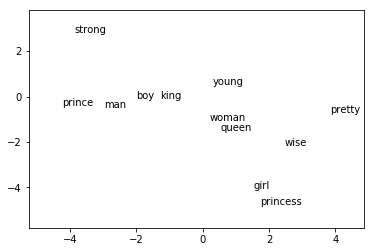

In [0]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for word, x1, x2 in zip(w2v_df['word'], w2v_df['x1'], w2v_df['x2']):
    ax.annotate(word, (x1,x2 ))
    
PADDING = 1.0
x_axis_min = np.amin(vectors, axis=0)[0] - PADDING
y_axis_min = np.amin(vectors, axis=0)[1] - PADDING
x_axis_max = np.amax(vectors, axis=0)[0] + PADDING
y_axis_max = np.amax(vectors, axis=0)[1] + PADDING
 
plt.xlim(x_axis_min,x_axis_max)
plt.ylim(y_axis_min,y_axis_max)
plt.rcParams["figure.figsize"] = (10,10)

plt.show()